In [20]:
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt

from beer_lambert_rt.model import run_model as beer_lambert
from seaicert.model import run_model as delta_eddington

In [9]:
ice_thickness = [0.5, 1., 1.5, 2.0, 3.0, 1.5]
snow_depth = [0., 0., 0., 0., 0., 0.3]

n = len(ice_thickness)
skin_temperature = [273.16] * n
latitude = [80.] * n
surface_irradiance = [420.] * n
sea_ice_concentration = [1.] * n
pond_depth = [0.] * n
pond_fraction = [0.] * n

time = [dt.datetime(2023, 5, 20, 11, 26, 53)] * n

In [17]:
bl_ocean_flux, bl_par, bl_transmittance = beer_lambert(ice_thickness, snow_depth, albedo, 
                                                       surface_irradiance, 
                                                       np.array(skin_temperature)-273.16, 
                                                       sea_ice_concentration,
                                                       use_distribution=False)

In [18]:
de_albedo, de_surface_flux, de_ocean_flux, de_transmittance = delta_eddington(latitude, time, ice_thickness, 
                                                                  snow_depth, skin_temperature, 
                                                                  sea_ice_concentration, pond_depth, 
                                                                  pond_fraction)

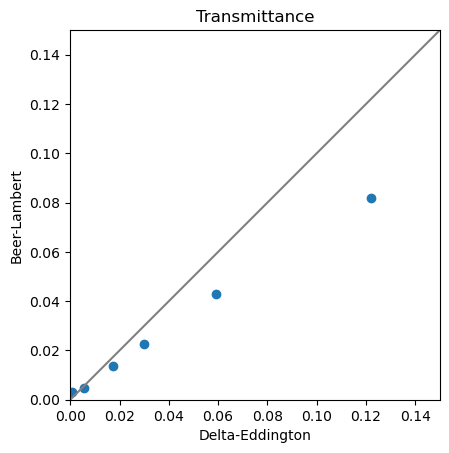

In [28]:
fig, ax = plt.subplots()

ax.scatter(de_transmittance, bl_transmittance)
ax.axline([0.,0.], [1.,1.], c='0.5')
ax.set_xlim(0., 0.15)
ax.set_ylim(0., 0.15)
ax.set_xlabel('Delta-Eddington')
ax.set_ylabel('Beer-Lambert')
ax.set_title('Transmittance')
ax.set_aspect('equal')

fig.savefig('tranmittance_comparison.png')